battery 카테고리: 총 4000개 데이터 증강 완료
biological 카테고리: 총 4000개 데이터 증강 완료
cardboard 카테고리: 총 4000개 데이터 증강 완료
glass 카테고리: 총 1000개 데이터 증강 완료
clothes 카테고리: 총 0개 데이터 증강 완료
metal 카테고리: 총 4000개 데이터 증강 완료
paper 카테고리: 총 4000개 데이터 증강 완료
에러 발생: Failed to read image: ./data\plastic\plastic_154.jpg, 파일 경로: ./data\plastic\plastic_154.jpg
plastic 카테고리: 총 4000개 데이터 증강 완료
shoes 카테고리: 총 4000개 데이터 증강 완료
trash 카테고리: 총 4000개 데이터 증강 완료
각 카테고리별 데이터 수를 처리하였습니다.


C:\Users\user\AppData\Local\Temp\ipykernel_9144\480784400.py:131: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9144\480784400.py:131: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9144\480784400.py:131: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9144\480784400.py:131: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9144\480784400.py:131: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9144\480784400.py:131: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sa

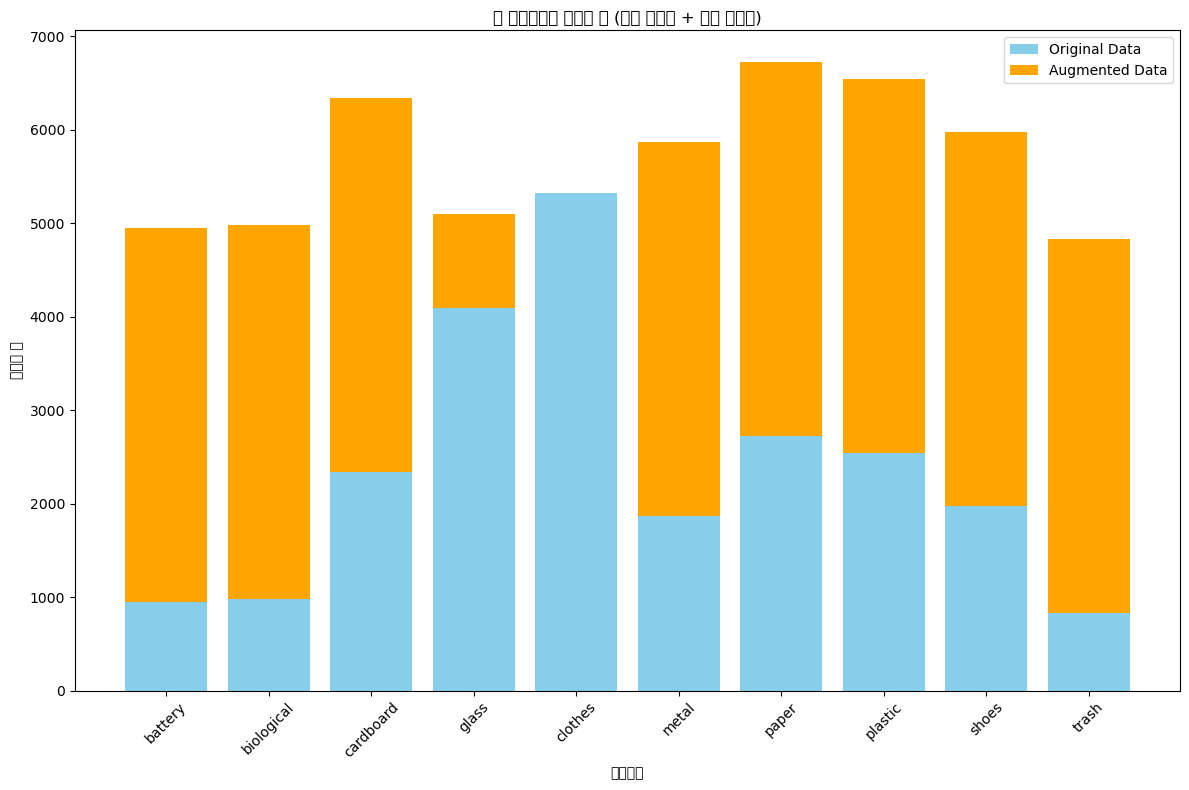

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def recycle_gray(image_path, target_size=(128, 128)):
    # 이미지 읽기
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to read image: {image_path}")
    # 그레이스케일 변환
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 현재 이미지 크기
    h, w = gray_image.shape
    # 정사각형 패딩 계산
    if h > w:
        diff = h - w
        pad_left = diff // 2
        pad_right = diff - pad_left
        pad_top, pad_bottom = 0, 0
    else:
        diff = w - h
        pad_top = diff // 2
        pad_bottom = diff - pad_top
        pad_left, pad_right = 0, 0
    # BORDER_REPLICATE를 사용하여 패딩 추가
    padded_image = cv2.copyMakeBorder(
        gray_image,
        pad_top, pad_bottom,
        pad_left, pad_right,
        cv2.BORDER_REPLICATE
    )
    # 패딩 후 리사이즈
    resized_image = cv2.resize(padded_image, target_size)
    return resized_image

# 원래 데이터 수
original_data_counts = {
    'battery': 945,
    'biological': 985,
    'cardboard': 2341,
    'glass': 4097,
    'clothes': 5325,
    'metal': 1869,
    'paper': 2727,
    'plastic': 2542,
    'shoes': 1977,
    'trash': 834
}

# 데이터 디렉토리 경로
base_directory = './data'
# 사용할 카테고리 폴더 이름
category_names = list(original_data_counts.keys())

# 데이터 증강 옵션 정의
augmentation_options = {
    'flip': True,      # 좌우 반전
    'rotate': [90, 180, 270]  # 회전 각도 리스트
}
# 데이터 증강 목표 수 설정 = 증강한 값 glass clothes 외 4000개씩.
category_limits = {
    'battery': 4000,
    'biological': 4000,
    'cardboard': 4000,
    'glass': 1000,         # glass 카테고리는 증강하지 않음 0개에서 확인후 1000개 추가
    'clothes': 0,
    'metal': 4000,
    'paper': 4000,
    'plastic': 4000,
    'shoes': 4000,
    'trash': 4000
}

# 각 카테고리마다 이미지 처리
augmented_data_counts = []
for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    file_list = os.listdir(category_directory)
    augmented_images = []  # 증강된 이미지 리스트
    num_processed = 0  # 처리된 이미지 수 카운트
    while num_processed < category_limits[category_name]:
        for file_name in file_list:
            input_path = os.path.join(category_directory, file_name)
            try:
                # 이미지 전처리 함수 호출
                processed_image = recycle_gray(input_path)
                # 데이터 증강 옵션 적용
                if len(augmented_images) < category_limits[category_name]:
                    augmented_images.append(processed_image)
                    num_processed += 1
                if augmentation_options['flip']:
                    flipped_image = cv2.flip(processed_image, 1)  # 1은 좌우 반전
                    if len(augmented_images) < category_limits[category_name]:
                        augmented_images.append(flipped_image)
                        num_processed += 1
                for angle in augmentation_options['rotate']:
                    M = cv2.getRotationMatrix2D((processed_image.shape[1] / 2, processed_image.shape[0] / 2), angle, 1)
                    rotated_image = cv2.warpAffine(processed_image, M, (processed_image.shape[1], processed_image.shape[0]))
                    if len(augmented_images) < category_limits[category_name]:
                        augmented_images.append(rotated_image)
                        num_processed += 1
                if num_processed >= category_limits[category_name]:
                    break
            except Exception as e:
                print(f"에러 발생: {e}, 파일 경로: {input_path}")
        if num_processed >= category_limits[category_name]:
            break
    augmented_data_counts.append(num_processed)
    print(f"{category_name} 카테고리: 총 {num_processed}개 데이터 증강 완료")

print("각 카테고리별 데이터 수를 처리하였습니다.")

# 총 데이터 수 계산 (원래 데이터 + 증강된 데이터)
total_data_counts = {category: original_data_counts[category] + augmented for category, augmented in zip(category_names, augmented_data_counts)}

# 카테고리 이름과 데이터 수로 bar plot 그리기
plt.figure(figsize=(12, 8))

# 원래 데이터 수 막대
original_bars = plt.bar(category_names, original_data_counts.values(), color='skyblue', label='Original Data')

# 증강된 데이터 수 막대 (원래 데이터 수 위에 쌓기)
augmented_bars = plt.bar(category_names, augmented_data_counts, bottom=list(original_data_counts.values()), color='orange', label='Augmented Data')

plt.xlabel('카테고리')
plt.ylabel('데이터 수')
plt.title('각 카테고리별 데이터 수 (원래 데이터 + 증강 데이터)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
